### Preprocessing the Data for a Neural Network

In [20]:
#Initial test analysis. "Family Size", the indicator in this example, will be replaced by number of EV charging stations
# OR replaced by total number of EVs owned in that given blockgroup/census tract

# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import sklearn as skl
import numpy as np
#  Import and read the charity_data.csv.
import pandas as pd 
df = pd.read_csv("../Data/Excel/TESTFILE_Race_Demographics_Block_Group_2010.csv")
df.head()

import matplotlib.pyplot as plt

df.head()

,OBJECTID,GEOID10,ID,NAME,STATE_NAME,ST_ABBREV,AREA,2010 Total Population (U.S. Census),2010 Population Density (Pop per Square Mile) (U.S. Census),2010 Male Population (U.S. Census),...,2000 Renter Occupied Housing Units (U.S. Census),State,County,Tract,Block Group,Shape__Area,Shape__Length,Shape_Length,Shape_Area,TEST
0,33798,60530107013,60530107013,6.053011e+07,California,CA,0.603730,1374,2265.8,679,...,35,6,53,10701,3,NaN,NaN,14086.471150,2440928.5,NaN
1,33799,60530107011,60530107011,6.053011e+07,California,CA,13.829918,1624,117.5,808,...,35,6,53,10701,1,NaN,NaN,36504.689580,55636320.0,NaN
2,33800,60530108042,60530108042,6.053011e+07,California,CA,48.317591,1653,36.4,880,...,308,6,53,10804,2,NaN,NaN,107260.481200,193834566.5,NaN
3,33801,60530009001,60530009001,6.053001e+07,California,CA,0.176607,1466,8254.5,764,...,156,6,53,900,1,NaN,NaN,4149.519047,713660.5,NaN
4,33802,60530009003,60530009003,6.053001e+07,California,CA,0.397913,3017,7620.6,1551,...,407,6,53,900,3,NaN,NaN,5249.788847,1595114.0,NaN


In [22]:
# Dropping non-beneficial fields
df_clean = df.drop(['AREA', 'GEOID10', 'OBJECTID', 'ID', 'NAME', 'STATE_NAME','ST_ABBREV', 'Shape__Area', 'Shape__Length', 'State', 'Shape_Length', 'Shape_Area', 'TEST'],1)
df_clean

,2010 Total Population (U.S. Census),2010 Population Density (Pop per Square Mile) (U.S. Census),2010 Male Population (U.S. Census),2010 Female Population (U.S. Census),2010 Population in Households (U.S. Census),2010 Population in Families (U.S. Census),2000-2010 Population Annual Compound Growth Rate (U.S. Census),2010 Population Inside Urbanized Areas (U.S. Census),2010 Population Inside Urban Clusters (U.S. Census),2010 Rural Population (U.S. Census),...,2000 Population in Households (U.S. Census),2000 Population in Families (U.S. Census),2000 Total Households (U.S. Census),2000 Total Family Households (U.S. Census),2000 Total Housing Units (U.S. Census),2000 Owner Occupied Housing Units (U.S. Census),2000 Renter Occupied Housing Units (U.S. Census),County,Tract,Block Group
0,1374,2265.8,679,695,1374,1273,-0.77,1374,0,0,...,1485,1384,510,434,516,475,35,53,10701,3
1,1624,117.5,808,816,1624,1480,-0.69,1330,0,294,...,1740,1603,620,520,628,585,35,53,10701,1
2,1653,36.4,880,773,1647,1482,-1.23,0,1109,544,...,1836,1653,456,369,477,148,308,53,10804,2
3,1466,8254.5,764,702,1463,1295,-0.19,1466,0,0,...,1494,1328,295,259,297,139,156,53,900,1
4,3017,7620.6,1551,1466,3017,2636,0.84,3017,0,0,...,2776,2439,645,546,671,238,407,53,900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,2057,11118.9,1040,1017,2057,1886,-1.61,2057,0,0,...,2419,2266,549,494,562,406,143,99,2301,1
23186,2728,9078.2,1448,1280,2728,2394,-0.03,2728,0,0,...,2653,2382,594,509,629,309,285,99,2402,1
23187,1342,5945.9,664,678,1246,1033,3.27,1342,0,0,...,973,805,360,238,369,218,142,99,2604,1
23188,1333,121.5,703,630,1243,1156,23.39,1052,0,281,...,163,139,63,50,65,56,7,1,451101,5


In [23]:
# Determine the number of unique values in each column.
df_clean.nunique()

2010 Total Population (U.S. Census)                             3527
2010 Population Density (Pop per Square Mile) (U.S. Census)    21330
2010 Male Population (U.S. Census)                              2112
2010 Female Population (U.S. Census)                            2118
2010 Population in Households (U.S. Census)                     3495
                                                               ...  
2000 Owner Occupied Housing Units (U.S. Census)                  972
2000 Renter Occupied Housing Units (U.S. Census)                1046
County                                                            58
Tract                                                           6518
Block Group                                                        9
Length: 135, dtype: int64

In [31]:
# Look at family zie value counts for binning. These will be replaced by EV charging stations per zipcode, or # of EVs per zip
# These may be per zip code, census tract, or census block, whichever we deem most useful.
family = df_clean['2010 Average Family Size (U.S. Census)'].value_counts()
family.head(50)

3.21    218
3.16    209
3.20    204
3.05    204
3.22    199
3.13    198
3.19    195
3.15    192
3.14    190
3.29    188
3.09    187
3.18    185
3.08    184
3.02    184
3.11    181
3.25    181
2.98    181
3.34    181
2.97    179
3.26    179
3.07    178
3.04    176
3.24    176
2.99    175
3.00    175
3.17    173
2.93    172
3.23    170
2.96    170
3.30    169
3.10    168
3.06    167
2.88    166
3.31    166
3.36    166
2.94    166
2.92    165
3.03    164
3.35    164
3.01    161
2.81    161
2.90    158
3.27    155
2.89    153
3.32    153
3.33    152
3.42    151
2.95    151
2.85    149
3.38    148
Name: 2010 Average Family Size (U.S. Census), dtype: int64

In [41]:
df_family = df_clean.rename({'2010 Average Family Size (U.S. Census)': 'family_size'}, axis=1)
df_family

,2010 Total Population (U.S. Census),2010 Population Density (Pop per Square Mile) (U.S. Census),2010 Male Population (U.S. Census),2010 Female Population (U.S. Census),2010 Population in Households (U.S. Census),2010 Population in Families (U.S. Census),2000-2010 Population Annual Compound Growth Rate (U.S. Census),2010 Population Inside Urbanized Areas (U.S. Census),2010 Population Inside Urban Clusters (U.S. Census),2010 Rural Population (U.S. Census),...,2000 Population in Households (U.S. Census),2000 Population in Families (U.S. Census),2000 Total Households (U.S. Census),2000 Total Family Households (U.S. Census),2000 Total Housing Units (U.S. Census),2000 Owner Occupied Housing Units (U.S. Census),2000 Renter Occupied Housing Units (U.S. Census),County,Tract,Block Group
0,1374,2265.8,679,695,1374,1273,-0.77,1374,0,0,...,1485,1384,510,434,516,475,35,53,10701,3
1,1624,117.5,808,816,1624,1480,-0.69,1330,0,294,...,1740,1603,620,520,628,585,35,53,10701,1
2,1653,36.4,880,773,1647,1482,-1.23,0,1109,544,...,1836,1653,456,369,477,148,308,53,10804,2
3,1466,8254.5,764,702,1463,1295,-0.19,1466,0,0,...,1494,1328,295,259,297,139,156,53,900,1
4,3017,7620.6,1551,1466,3017,2636,0.84,3017,0,0,...,2776,2439,645,546,671,238,407,53,900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,2057,11118.9,1040,1017,2057,1886,-1.61,2057,0,0,...,2419,2266,549,494,562,406,143,99,2301,1
23186,2728,9078.2,1448,1280,2728,2394,-0.03,2728,0,0,...,2653,2382,594,509,629,309,285,99,2402,1
23187,1342,5945.9,664,678,1246,1033,3.27,1342,0,0,...,973,805,360,238,369,218,142,99,2604,1
23188,1333,121.5,703,630,1243,1156,23.39,1052,0,281,...,163,139,63,50,65,56,7,1,451101,5


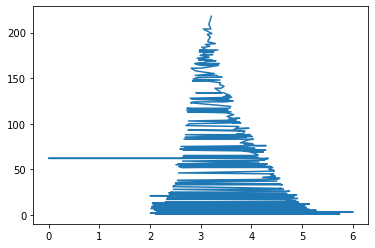

In [42]:
# Visualize the value counts of APPLICATION_TYPE
%matplotlib inline
plt.plot(family)
plt.show()

<AxesSubplot:ylabel='Density'>

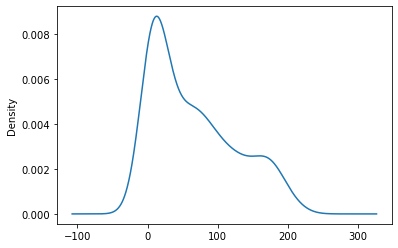

In [33]:
family.plot.density()

In [39]:
# Determine which values to replace if counts are less than ...?
replace_application = list(family[family < 200].index)

# Replace in dataframe
for fam in replace_application:
    df_family.family_size= df_.family_size.replace(fam,"Other")
    
# Check to make sure binning was successful
df_family.family_size.value_counts()

3.21     218
3.16     209
3.05     204
3.2      204
3.22     199
        ... 
5.43       1
5.74       1
5.51       1
Other      1
5.69       1
Name: family_size, Length: 355, dtype: int64

In [9]:
# # Look at CLASSIFICATION value counts for binning
# class_count = df_family.CLASSIFICATION.value_counts()
# class_count

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2570        1
C3700        1
C1283        1
C5200        1
C4200        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

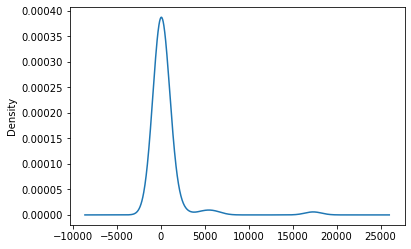

In [10]:
# # Visualize the value counts of CLASSIFICATION
# class_count.plot.density()

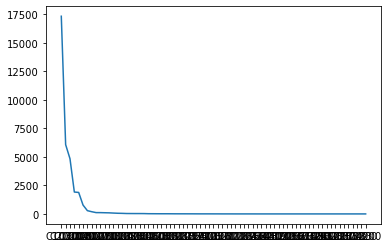

In [11]:
# %matplotlib inline
# plt.plot(class_count)
# plt.show()

In [12]:
# # Determine which values to replace if counts are less than ..?
# #odd - no matter how I change the 'count < #' the application_df does not change..
# replace_class = list(class_count[class_count < 1000].index)

# # Replace in dataframe
# for cls in replace_class:
#     application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# # Check to make sure binning was successful
# application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [45]:
# Generate our categorical variable lists
cat_df = df_family.dtypes[df_family.dtypes == "object"].index.tolist()
cat_df

[]

In [46]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df_family[cat_df]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_df)
encode_df.head()

""
0
1
2
3
4


In [47]:
# Merge one-hot encoded features and drop the originals
df_family = df_family.merge(encode_df,left_index=True,right_index=True).drop(cat_df,1)
df_family


,2010 Total Population (U.S. Census),2010 Population Density (Pop per Square Mile) (U.S. Census),2010 Male Population (U.S. Census),2010 Female Population (U.S. Census),2010 Population in Households (U.S. Census),2010 Population in Families (U.S. Census),2000-2010 Population Annual Compound Growth Rate (U.S. Census),2010 Population Inside Urbanized Areas (U.S. Census),2010 Population Inside Urban Clusters (U.S. Census),2010 Rural Population (U.S. Census),...,2000 Population in Households (U.S. Census),2000 Population in Families (U.S. Census),2000 Total Households (U.S. Census),2000 Total Family Households (U.S. Census),2000 Total Housing Units (U.S. Census),2000 Owner Occupied Housing Units (U.S. Census),2000 Renter Occupied Housing Units (U.S. Census),County,Tract,Block Group
0,1374,2265.8,679,695,1374,1273,-0.77,1374,0,0,...,1485,1384,510,434,516,475,35,53,10701,3
1,1624,117.5,808,816,1624,1480,-0.69,1330,0,294,...,1740,1603,620,520,628,585,35,53,10701,1
2,1653,36.4,880,773,1647,1482,-1.23,0,1109,544,...,1836,1653,456,369,477,148,308,53,10804,2
3,1466,8254.5,764,702,1463,1295,-0.19,1466,0,0,...,1494,1328,295,259,297,139,156,53,900,1
4,3017,7620.6,1551,1466,3017,2636,0.84,3017,0,0,...,2776,2439,645,546,671,238,407,53,900,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23185,2057,11118.9,1040,1017,2057,1886,-1.61,2057,0,0,...,2419,2266,549,494,562,406,143,99,2301,1
23186,2728,9078.2,1448,1280,2728,2394,-0.03,2728,0,0,...,2653,2382,594,509,629,309,285,99,2402,1
23187,1342,5945.9,664,678,1246,1033,3.27,1342,0,0,...,973,805,360,238,369,218,142,99,2604,1
23188,1333,121.5,703,630,1243,1156,23.39,1052,0,281,...,163,139,63,50,65,56,7,1,451101,5


In [48]:
df_family.head()

,2010 Total Population (U.S. Census),2010 Population Density (Pop per Square Mile) (U.S. Census),2010 Male Population (U.S. Census),2010 Female Population (U.S. Census),2010 Population in Households (U.S. Census),2010 Population in Families (U.S. Census),2000-2010 Population Annual Compound Growth Rate (U.S. Census),2010 Population Inside Urbanized Areas (U.S. Census),2010 Population Inside Urban Clusters (U.S. Census),2010 Rural Population (U.S. Census),...,2000 Population in Households (U.S. Census),2000 Population in Families (U.S. Census),2000 Total Households (U.S. Census),2000 Total Family Households (U.S. Census),2000 Total Housing Units (U.S. Census),2000 Owner Occupied Housing Units (U.S. Census),2000 Renter Occupied Housing Units (U.S. Census),County,Tract,Block Group
0,1374,2265.8,679,695,1374,1273,-0.77,1374,0,0,...,1485,1384,510,434,516,475,35,53,10701,3
1,1624,117.5,808,816,1624,1480,-0.69,1330,0,294,...,1740,1603,620,520,628,585,35,53,10701,1
2,1653,36.4,880,773,1647,1482,-1.23,0,1109,544,...,1836,1653,456,369,477,148,308,53,10804,2
3,1466,8254.5,764,702,1463,1295,-0.19,1466,0,0,...,1494,1328,295,259,297,139,156,53,900,1
4,3017,7620.6,1551,1466,3017,2636,0.84,3017,0,0,...,2776,2439,645,546,671,238,407,53,900,3


In [49]:
# Split our preprocessed data into our features and target arrays
y= df_family["family_size"].values
X=df_family.drop(["family_size"],1).values
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [50]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [51]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features=len(X_train[0])
hidden_nodes_layer1=100
hidden_nodes_layer2=100
hidden_nodes_layer3=100
hidden_nodes_layer4=100
hidden_nodes_layer5=100
hidden_nodes_layer6=100
hidden_nodes_layer7=100


nn = tf.keras.models.Sequential()
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))
# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='relu'))
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer7, activation='relu'))

    
# Output layer
nn.add(
    tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               13500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1

In [52]:
# Compile the model
nn.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [53]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=20)

Epoch 1/20
544/544 [==============================] - 1s 2ms/step - loss: -266784653269580288.0000 - accuracy: 0.0000e+00
Epoch 2/20
544/544 [==============================] - 1s 2ms/step - loss: nan - accuracy: 2.5280e-04            
Epoch 3/20
544/544 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0020
Epoch 4/20
544/544 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0024
Epoch 5/20
544/544 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0026
Epoch 6/20
544/544 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0030
Epoch 7/20
544/544 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0027
Epoch 8/20
544/544 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0030
Epoch 9/20
544/544 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.0031
Epoch 10/20
544/544 [==============================] - 1s 2ms/step - loss: nan - accur

In [54]:
# Evaluate the model using the test data
print(f"Optimization 1 \n In this optimization, I added 7 layers (each with 100 nodes), 20 total epochs, and eliminated multiple field variables \n")

model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Optimization 1 
 In this optimization, I added 7 layers (each with 100 nodes), 20 total epochs, and eliminated multiple field variables 

182/182 - 0s - loss: nan - accuracy: 0.0029
Loss: nan, Accuracy: 0.0029320456087589264


In [26]:
# nn.save("EV_TEST.h5")